# A Python Analysis of Human RSV
### What is RSV? 
hRSV stands for respiratory syncitial virus, and is also known as human orthopneumovirus. This virus infects the lungs and the bronchioles and is very common. It generally causes cold-like symptoms, and in some cases, infected adults do not show any symptoms. In more vulnerable populations (young children and the elderly), hRSV can cause bronchiolitis and pneumonia, which can be potentially dangerous.
### Why is This Important Right Now?
Viruses are a tough subject in 2022, as our country is still healing from the COVID-19 pandemic. Lockdown and the ensuing restrictions had a multitude of consequences, one of which being the creation of an "immunity debt." This phrase can be defined as the resulting lack of immunity that results as a consequence of decreased exposure to natural pathogens. Many young children who would gave been exposed to various natural pathogens, including hRSV, have not had natural exposure. Most children also generally receive an RSV injection by age 2, however COVID-19 have delayed some of these injections as well. A combination of both of these factors have caused an early surge in the hRSV infections and hospitalizations that are unprecendented for this time of year. Many children's hospitals are at or near capacity and stretching their resources thin. The Orange County Health Care Agency even issued a Declaration of Health Emergency due to the virus.
### What Does This Project Intend to do?
The goal of our project is to explore the DNA of a patient who tested positive for RSV by first testing to see what type of nucleic acid the sequence is, then making sure we obtain an RNA sequence of the virus. From here we can translate the RNA into an amino acid sequence, where we will run a BLAST analysis to see what proteins are present in our original sequence.

### Sources for this project:
https://www.sciencedirect.com/science/article/pii/S0168170222002787

https://www.ncbi.nlm.nih.gov/nuccore/OK500256.1/

https://www.cnn.com/2022/10/26/health/rsv-immunity-gap

https://www.latimes.com/california/story/2022-11-01/rsv-health-emergency-what-you-should-know

https://www.cell.com/cell/fulltext/S0092-8674(19)30902-X?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS009286741930902X%3Fshowall%3Dtrue


In [1]:
# First, we must ensure that the biopython package is installed
!pip install biopython

Defaulting to user installation because normal site-packages is not writeable


### What Data Can be Accessed?
This code can only use data from the Nucleotide database from NCBI. In order to use this code to analyze a different RNA virus, the accession number (listed under id) must be changed.

In [ ]:
# The Bio.Entrez module allows us to retrieve data from NCBI. In this case, we want to access sample 'OK500256'
from Bio import Entrez, SeqIO
Entrez.email = ''
# Email is incase there is a problem, NCBI can contact you
handle = Entrez.efetch(db="nucleotide", id="OK500256", rettype="gb", retmode="text")
# Now that we have retrieved the data from NCBI, we will use the SeqIO module to access the nucleotide sequence of this sample.
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()
rsv = recs[0].seq
rsv_sequence = rsv.lower()
print(rsv_sequence)
print(f'This sample of RSV consists of {len(rsv_sequence)} nucleotides.')

gcgtacaacaaacttgcgtaaaccaaaaaaatggggcaaataagaatttgataagtaccacttaaatttaactcccttggttagagatgggcagcaactcattgagtatgataaaagttagattgcaaaatctgtttgacaatgatgaagtagcattgttaaaaataacatgctatactgacaaattaatacagttaactaatgctttggctaaggcagttatacatacaatcaaattgaatggcattgtatttgtgcatgttattacaagtagtgatatttgccctaataataatattgtagtgaaatccaatttcacaacaatgccagtattacaaaatggaggttatatatgggaaatgatggaattaacacactgctctcaacctaatggcctaatagatgacaattgtgaaattaaattctccaaaaaactaagtgattcaacaatgaccaattatatgaatcaattatctgaattacttggatttgacctcaatccataaatcataataaatatcaactagcaaatcaatgtcactaacaccattagttaatataaaactcgacagaagataaaaatggggcaaataaatcaattcatccgacccaaccatggacacaacacacaatgataccacaccacaaagactgatgatcacagacatgagaccattatcgcttgagactataataacatctctaaccagagatatcataacacataaatttatatacttgataaatcatgaatgcatagtgagaaaacttgatgaaagacaggccacatttacatttctggtcaactatgaaatgaaactattgcacaaagtgggaagcactaaatataaaaaatatactgaatacaacacaaaatatggcactttccctatgccaatatttatcaatcatgatgggttcttagaatgcattggcattaagcctaccaagcacacacccataatatacaagtatgatctcaatccatgaatatcaaacc

## What is Sample OK500256?

NCBI Sample 'OK500256' is a sample from a French hospital from an RSV-positive patient in early 2021. RSV is supposed to have an RNA-based genome. Let's test to see if this is RNA:

In [ ]:
def verify(virus_sequence):
    seq = set(virus_sequence)

    if seq == {"a", "t", "c", "g"}.union(seq):
        return "DNA"
    elif seq == {"a", "u", "c", "g"}.union(seq):
        return "RNA"
    else:
        return "neither DNA or RNA"
 
print("This sequence is " + verify(rsv_sequence))

This sequence is DNA


This result shows that the NCBI sequence is DNA, not RNA, which means that this must be a complementary DNA (cDNA) sequence that is generally produced by Next Generation Sequencing technology. Let's convert this back to RNA and verify to make sure it worked properly:

In [ ]:
def transcribe(base):
    
    rsv_rna_genome = []
    for i in base:
        if i == "t":
            rsv_rna_genome.append("a")
        if i == "a":
            rsv_rna_genome.append("u")
        if i == "g":
            rsv_rna_genome.append("c")
        if i == "c":
            rsv_rna_genome.append("g")
    
    #Reverse the sequence to make sure it is complementary
            
    rsv_rna_genome = rsv_rna_genome[::-1]
            
    return ''.join(rsv_rna_genome)

rsv_rna_genome = transcribe(rsv_sequence)
print(rsv_rna_genome)
#Use the verify function we designed earlier
print("This sequence is " + verify(rsv_rna_genome))

acgagaaaaaaagugucaaaaacuaauaucucguaauuuaguuaauauacauauaaaccaauuagauuuggauuuaaacuuauucuuccuagaucaaaaugauaauuuuaagauuaguucacuagagguuauuaaaaaaauuauauaauuauuaauuuuaaauaacuauaauugaauacaauguuaguguguagcuauuuuuguuauaagauuuuugcucauuauucauuauaaaaguuguauaacaaacuaccugugauuuuaaucaguuuuuuaaguucauugguugucaagcuguuuaacaauucacuuagaugaggauaaguagauucuaccauauauaaaugauuauaguuuaauucuguugaucugaaauuuaaaacaugauugaaccacuuuaagauguucauaugcuuaugauuuauaaguuuauugcugaaaacuucauuacguccagcuauagaauaugauaguauaucuccacuaacaacacucuuuaauuuagacaaugcaguauuaauuccuuuuuuuguuauaggguaacaaagaaaggguaucaaacucuuaauauuugcaucaauagacucuuuaucagcuuuuuuaggcaugaugaaauuuuugguucuugauaguaucaauuuagcauuuuguacuacauuaaauacugggaacacauuugcaggaccuauuguaaggacuaaguaaacuucagaucccuuuaacuuacugccuaagcauacauaaguuuuuaauauaguuauguugucuaauuugaaaucgauaucaucuugagcaugauauuuuacuauuaauguacauuuauuaacugaagaacaguacuugcauuuucuuacaugcuugcuccacucuauuauaaucuuacuccaguugacuguuacaggcaauucagcaucacagacaaaaagacugauagguucagcaaacuuuacauguaaauaagaccaaugaauguuguugguugcgucuguagcaggaaugg

Let's take a closer look at the genome of sample 'OK500256':

In [ ]:
# We can create a dictionary where the key is the nucleotide, and the value is frequency in the 
count_nucleotides = {
    'A': rsv_rna_genome.count('a'),
    'U': rsv_rna_genome.count('u'),
    'C': rsv_rna_genome.count('c'),
    'G': rsv_rna_genome.count('g')
}
print(count_nucleotides)

{'A': 4236, 'U': 5929, 'C': 2395, 'G': 2703}


Let's Graph this!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

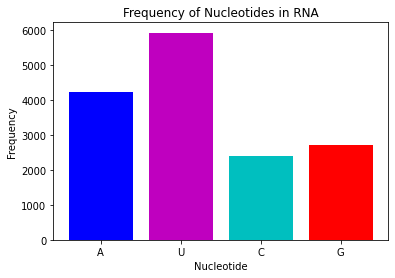

In [ ]:
nucleotide = list(count_nucleotides.keys(),)
frequency = list(count_nucleotides.values(),)
plt.bar(nucleotide, frequency, color = ['b', 'm', 'c', 'r'])
plt.title("Frequency of Nucleotides in RNA")
plt.xlabel("Nucleotide")
plt.ylabel("Frequency")
plt.show

## We now have the genome of our Human RSV sample. What's Next?

RSV is a single-stranded RNA (ssRNA) virus. There are two types of ssRNA viruses: positive sense (+ssRNA) and negative sense (-ssRNA). 

The viral genome of +ssRNA viruses act like mRNA, and can immediately be translated into proteins. The viral genome of -ssRNA viruses need to be copied to become +ssRNA, so translation can occur.

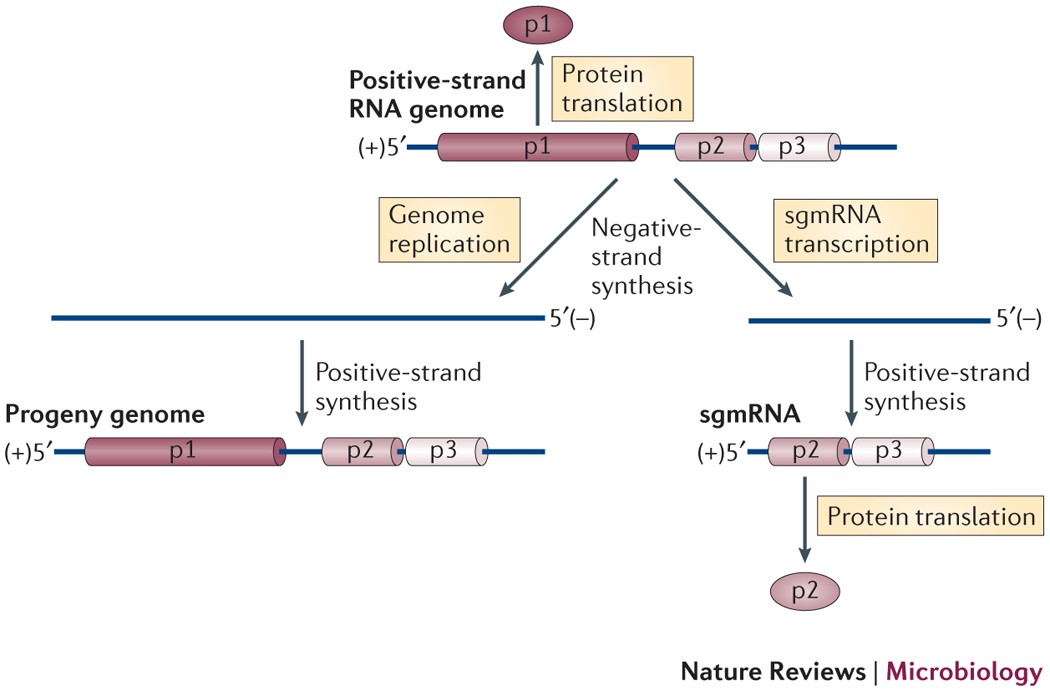

RSV happens to be a -ssRNA virus, so the genome must be copied one more time before translation.

Note: This code can only work on other -ssRNA viruses, as a +ssRNA virus will not need to be copied from RNA to RNA again.

In [ ]:
# This function will transcribe RNA to RNA, which differs from the transcribe function that was DNA to RNA.
def transcribeRNA(base):
    
    rna = []
    for i in base:
        if i == "u":
            rna.append("a")
        if i == "a":
            rna.append("u")
        if i == "g":
            rna.append("c")
        if i == "c":
            rna.append("g")

    rna = rna[::-1]
            
    return ''.join(rna)

rsv_mrna = transcribeRNA(rsv_rna_genome)
print(rsv_mrna)
#Use the verify function we designed earlier
print("This sequence is " + verify(rsv_mrna))

gcguacaacaaacuugcguaaaccaaaaaaauggggcaaauaagaauuugauaaguaccacuuaaauuuaacucccuugguuagagaugggcagcaacucauugaguaugauaaaaguuagauugcaaaaucuguuugacaaugaugaaguagcauuguuaaaaauaacaugcuauacugacaaauuaauacaguuaacuaaugcuuuggcuaaggcaguuauacauacaaucaaauugaauggcauuguauuugugcauguuauuacaaguagugauauuugcccuaauaauaauauuguagugaaauccaauuucacaacaaugccaguauuacaaaauggagguuauauaugggaaaugauggaauuaacacacugcucucaaccuaauggccuaauagaugacaauugugaaauuaaauucuccaaaaaacuaagugauucaacaaugaccaauuauaugaaucaauuaucugaauuacuuggauuugaccucaauccauaaaucauaauaaauaucaacuagcaaaucaaugucacuaacaccauuaguuaauauaaaacucgacagaagauaaaaauggggcaaauaaaucaauucauccgacccaaccauggacacaacacacaaugauaccacaccacaaagacugaugaucacagacaugagaccauuaucgcuugagacuauaauaacaucucuaaccagagauaucauaacacauaaauuuauauacuugauaaaucaugaaugcauagugagaaaacuugaugaaagacaggccacauuuacauuucuggucaacuaugaaaugaaacuauugcacaaagugggaagcacuaaauauaaaaaauauacugaauacaacacaaaauauggcacuuucccuaugccaauauuuaucaaucaugauggguucuuagaaugcauuggcauuaagccuaccaagcacacacccauaauauacaaguaugaucucaauccaugaauaucaaacc

Now that we have copied the -ssRNA genome, the virus can now be translated!

In [ ]:
#We can make a dictionary pairing each codon with it's amino acid abbreviation
rna_codons = {
    # 'M' = START, '-' = STOP
    "gcu": "A", "gcc": "A", "gca": "A", "gcg": "A",
    "ugu": "C", "ugc": "C",
    "gau": "D", "gac": "D",
    "gaa": "E", "gag": "E",
    "uuu": "F", "uuc": "F",
    "ggu": "G", "ggc": "G", "gga": "G", "ggg": "G",
    "cau": "H", "cac": "H",
    "aua": "I", "auu": "I", "auc": "I",
    "aaa": "K", "aag": "K",
    "uua": "L", "uug": "L", "cuu": "L", "cuc": "L", "cua": "L", "cug": "L",
    "aug": "M",
    "aau": "N", "aac": "N",
    "ccu": "P", "ccc": "P", "cca": "P", "ccg": "P",
    "caa": "Q", "cag": "Q",
    "cgu": "R", "cgc": "R", "cga": "R", "cgg": "R", "aga": "R", "agg": "R",
    "ucu": "S", "ucc": "S", "uca": "S", "ucg": "S", "agu": "S", "agc": "S",
    "acu": "T", "acc": "T", "aca": "T", "acg": "T",
    "guu": "V", "guc": "V", "gua": "V", "gug": "V",
    "ugg": "W",
    "uau": "Y", "uac": "Y",
    "uaa": "-", "uag": "-", "uga": "-"
}

In [ ]:
rsv_protein = ""
for i in range(0, len(rsv_mrna)-(3+len(rsv_mrna)%3), 3):
    rsv_protein += rna_codons[rsv_mrna[i:i+3]]
    
    
print(rsv_protein)
print(f'We have {len(rsv_protein)} amino acids in the RSV genome')

AYNKLA-TKKMGQIRI--VPLKFNSLG-RWAATH-V--KLDCKICLTMMK-HC-K-HAILTN-YS-LMLWLRQLYIQSN-MALYLCMLLQVVIFALIIIL--NPISQQCQYYKMEVIYGK-WN-HTALNLMA--MTIVKLNSPKN-VIQQ-PII-INYLNYLDLTSIHKS--ISTSKSMSLTPLVNIKLDRR-KWGK-INSSDPTMDTTHNDTTPQRLMITDMRPLSLETIITSLTRDIITHKFIYLINHECIVRKLDERQATFTFLVNYEMKLLHKVGSTKYKKYTEYNTKYGTFPMPIFINHDGFLECIGIKPTKHTPIIYKYDLNP-ISNQDSNNPK-QLYA-SHSIIQMEPGNYSYLKLRKDIR-KMGQIQKWLLAKSS-MIHSTKINFYHPANIPSNGAQETALTLLIMMCRNTLISYVACY-SQKMLIINSLG--VCYMLCLD-EEKTP-KYSKMRDIMLRQMEWM-QHIDKTSMGKK-NLKC-HWQA-QLKFKSTLR-NLENPTKKC-KKWERWLQNTGMTLLIVG--YYV-QH---PN-QQEIDQVLQL-LGELIMS-KMK-NVIKVYYPRI-PTASMKCLKNILTL-MFLFILV-HNLLPEVAVELKGFLQDCL-MPMVQGK-CYGGGS-QNQLKTLC-DTLVYKQKWNKLWRCMSMLRNWVEKQDSTIY-TTQKHHYYL-LNFLTSLVSYWAMLLA-A-WENTEVHQGIKIYMTLQKHMLNNSKKMV-LTTVY-I-QQKN-RLSNISLIQKIMM-SFELIKKWGK-IIMEKFAPEFHGEDANNRATKFLESIKGKFTSPKDPKKKDSIISVNSIDIEVTKESPITSNSTIINPINETDDTVGNKPNYQRKPLVSFKEDPMPSDNPFSKLYKETIETFDNNEEESSYSYEEINDQTNDNITARLDRIDEKLSEILGMLHTLVVASAGPTSARDGIRDAMVGLREEMIEKIRTEALMTNDRLEAMARLRNEESEKMAKDTSDEVSLNPTSEK

Let's take a closer look at the frequency of amino acids:

In [ ]:
count_amino_acids = {
    'A': rsv_protein.count('A'),
    'C': rsv_protein.count('C'),
    'D': rsv_protein.count('D'),
    'E': rsv_protein.count('E'),
    'F': rsv_protein.count('F'),
    'G': rsv_protein.count('G'),
    'H': rsv_protein.count('H'),
    'I': rsv_protein.count('I'),
    'K': rsv_protein.count('K'),
    'L': rsv_protein.count('L'),
    'M': rsv_protein.count('M'),
    'N': rsv_protein.count('N'),
    'P': rsv_protein.count('P'),
    'Q': rsv_protein.count('Q'),
    'R': rsv_protein.count('R'),
    'S': rsv_protein.count('S'),
    'T': rsv_protein.count('T'),
    'V': rsv_protein.count('V'),
    'W': rsv_protein.count('W'),
    'Y': rsv_protein.count('Y'),
}
# STOP codons were not included here as they are not amino acids.
print(count_amino_acids)

{'A': 172, 'C': 99, 'D': 208, 'E': 210, 'F': 163, 'G': 169, 'H': 161, 'I': 455, 'K': 410, 'L': 550, 'M': 129, 'N': 395, 'P': 181, 'Q': 208, 'R': 167, 'S': 413, 'T': 362, 'V': 233, 'W': 55, 'Y': 217}


<function matplotlib.pyplot.show(*args, **kw)>

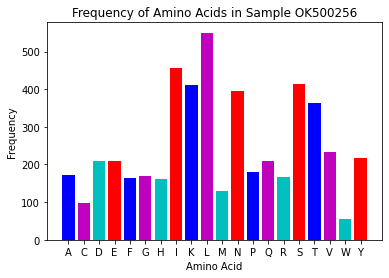

In [ ]:
amino_acid = list(count_amino_acids.keys(),)
Frequency = list(count_amino_acids.values(),)
plt.bar(amino_acid, Frequency, color = ['b', 'm', 'c', 'r'])
plt.title("Frequency of Amino Acids in Sample OK500256")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.show


  We have now analyzed the original sequence at a molecular level, but we want to understand what this means. Because a virus does not divide to replicate, the genome of viruses must encode for many proteins that are important for the replication and ultimately the survival of the virus. Two examples of this are an RNA polymerase, to ensure the replication of the viral genome, and a viral protease, to cleave non-functional polyproteins to multiple separate, functional proteins. Without these, the virus will not be able to survive and will be eradicated. 
  
  Using the biopython package, we can run a Basic Local Alignment Search Tool (BLAST) analysis. Using BLAST, we can create alignments between our sequence and known sequences in the NCBI database.

In [ ]:
# We can separate the amino acid sequences by stop codon (noted as "-") using the split function
ORFs = rsv_protein.split('-')

print(f'There are {len(ORFs)} possible proteins in this genome')

#Any polypeptide under 20 amino acids will not be able to make functional proteins, we can create a for loop to remove those:
for protein in ORFs:
  if len(protein) < 20:
    ORFs.remove(protein)

print(f'There are {len(ORFs)} functional proteins in this genome')

There are 130 possible proteins in this genome
There are 70 functional proteins in this genome


In [ ]:
protein_sorts = sorted(ORFs, key = len)
longest_protein = protein_sorts[-1]
print(f'The longest protein is {len(longest_protein)} amino acids long')

The longest protein is 2174 amino acids long


Let's examine this specific protein:

In [ ]:
# We first have to import the Seq function, to import our amino acid sequence as a Seq object so biopython can read it
from Bio.Seq import Seq
longest_protein = Seq(longest_protein)
longest_protein

Seq('LKQFKLWDKMDPIISGNSANVYLTDSYLKGVISFSECNALGSYIFNGPYLKNDY...YNE')

In [ ]:
# In order to import the longest_protein into the BLAST feature, we need to convert it into a FASTA file
with open("protein_sequence.fasta", "w") as file:
    file.write(f">rsv protein\n{longest_protein}")


In [ ]:
# Now we can use SeqIO (which we imported earlier to read our FASTA file)
protein_sequence = SeqIO.read("protein_sequence.fasta", "fasta")

In [ ]:
# Let's ensure this is the same as longest_protein
protein_sequence.seq

Seq('LKQFKLWDKMDPIISGNSANVYLTDSYLKGVISFSECNALGSYIFNGPYLKNDY...YNE')

Now we can see that protein_sequence is the same as longest_sequence, lets run the BLAST search through the protein data bank

In [ ]:
# We first import the Bio.Blast module
from Bio.Blast import NCBIWWW
# We can now use the qblast() function to call the online version of BLAST
result_handle = NCBIWWW.qblast("blastp", "pdb", protein_sequence.seq)

Our BLAST results are now stored in result_handle. We can use the SearchIO module to read these results

In [ ]:
from Bio import SearchIO
blast_records = SearchIO.read(result_handle, 'blast-xml')

Using a for loop, we can print our blast results for each hit. In our case, we will print the PDB Sequence ID, protein description, E-value (The number of hits this alignment would have by chance), Bit Score (An overall score of sequence similarity), and the Alignment itself

In [ ]:
for blast in blast_records:
    print(f"Sequence ID: {blast.id}")
    print(f"description: {blast.description}")
    print(f"E value: {blast[0].evalue}")
    print(f"Bit Score:  {blast[0].bitscore}")
    print(f"alignment:\n{blast[0].aln}")
    print()

Sequence ID: pdb|6PZK|A
description: Cryo-EM Structure of the Respiratory Syncytial Virus Polymerase (L) Protein Bound by the Tetrameric Phosphoprotein (P) [Human respiratory syncytial virus A2]
E value: 0.0
Bit Score:  4377.39
alignment:
Alignment with 2 rows and 2165 columns
MDPIISGNSANVYLTDSYLKGVISFSECNALGSYIFNGPYLKND...YNE unnamed
MDPIINGNSANVYLTDSYLKGVISFSECNALGSYIFNGPYLKND...HNE pdb|6PZK|A

Sequence ID: pdb|6UEN|A
description: Chain A, RNA-directed RNA polymerase L [Human orthopneumovirus]
E value: 0.0
Bit Score:  3047.68
alignment:
Alignment with 2 rows and 1500 columns
MDPIISGNSANVYLTDSYLKGVISFSECNALGSYIFNGPYLKND...GHW unnamed
MDPIINGNSANVYLTDSYLKGVISFSECNALGSYIFNGPYLKND...GHW pdb|6UEN|A

Sequence ID: pdb|6U5O|L
description: Structure of the Human Metapneumovirus Polymerase bound to the phosphoprotein tetramer [Human metapneumovirus CAN97-83]
E value: 0.0
Bit Score:  1806.57
alignment:
Alignment with 2 rows and 2169 columns
MDPIISGNSANVYLTDSYLKGVISFSECNALGSYIFNGPYLKND...SLL unn

### We can see that the most significant alignment for our longest protein is the the RSV Polymerase found in the large (L) protein. Accessing the PDB information for this protein, it confirms that this is the RNA Polymerase found in human RSV.

#Reflection:

###Matthew Howard:
Coming into this class, I had absolutely zero experience with coding in any language. I have had an interest in learning for the last couple of years, but I never got around to giving it a shot. As this is my final quarter at UCSD, I had an opening in classes and I finally decided to give it a go. After completing this final project, I can say that I was glad that I gave it a shot. While we learned many general skills in python, this project allowed me to expand that knowledge to the field of biology, which is my passion. At one point, we were just learning about what a loop was, but this project allowed me to practice those skills in analyzing molecular patterns. As someone who is interested in the field of functional genomics, I can proudly say that this class, and specifically this project, have allowed me to broaden my skill set in my field of interest and become a better biologist as a result.

###Juri Dojun
Having taken a few introductory coding classes in high school, I have always wanted to expand my knowledge in the field of data science and computer science. I have viewed coding as an imperative skill as a science major and I thought that this course would offer me the perfect opportunity to explore the field of computer science while also maintaining a connection with my major, cellular and molecular biology. Although I had some background knowledge regarding basic coding algorithms prior to this class, this class was definitely a challenge for me because it was my first time performing data analysis through coding. I honestly started this project with little to no confidence in utilizing data packets and using the data to create various functions and graphs. However, through this project, I was able to familiarize myself with how the data packet functioned by playing around with biopython and also was able to learn how to extract specific parts of data (i.e. RNA) to fit the purpose of our project. This project was a great opportunity to hone my coding skills in python in a biological background. I found this coding experience fascinating and found it far more interesting than my prior coding experiences. 


###Reeanna Tareq
I decided to take this class because I had never taken a coding class in my life, but heard that python was the most universally understandable coding language. When I found that there was a class which combined coding with biology, a subject related to the field of work I want to go into, I figured it would make coding relevant and meaningful to me. The flow of the class organized the skills I needed to know coming into the final project in a meaningful way as I was able to build on my understanding week by week. While working on this final project, I was able to implement the essential python techniques I learned in class such as loops and creating graphs to apply to an actual human’s DNA. This challenged, but expanded my knowledge on the possibilities of what python can do by learning how to take data from the NCBI database and analyze a sample for proteins. Overall, I see myself applying the knowledge I learned in this class to my future career as a biologist. 
